In [60]:
import pandas as pd
import xlrd
import WardHierarchicalClustering as WHS
from matplotlib import pyplot as plt
import EquivalenceClassificationAlgorithm as Eclat
import numpy as np, itertools
import re
from scipy.cluster import hierarchy
from random import randrange

In [6]:
file = 'repetitors_1.xlsx'

# КЛАСТЕРИЗАЦИЯ

In [7]:
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
df

,Column1,author,date,discipline,id,mark,reply,text,tutorlink,tutorname
0,0.0,Юлия,2019-07-03,биология,3913905.0,лучше не бывает!,NaN,Очень грамотный и приятный преподаватель ) оче...,https://repetitors.info/repetitor/?p=SuhorukovaNA,Сухорукова Наталия Альбертовна
1,1.0,Ксения,2019-07-03,не указана,3913841.0,лучше не бывает!,NaN,"Прислушивается к потребностям, очень хорошо об...",https://repetitors.info/repetitor/?p=RebrovRU,Ребров Родион Юрьевич
2,2.0,Виктория,2019-07-03,физика,3913830.0,лучше не бывает!,NaN,Сын писал пробный ЕГЭ на 70 баллов. Стал заним...,https://repetitors.info/repetitor/?p=SadovnikovSV,Садовников Сергей Викторович
3,3.0,Жанна,2019-07-03,английский язык,3913781.0,лучше не бывает!,NaN,"Лидия замечательный преподаватель, пунктуальны...",https://repetitors.info/repetitor/?p=ErshovaLV5,Ершова Лидия Владимировна
4,4.0,Елена,2019-07-03,русский язык,3913776.0,лучше не бывает!,NaN,"Плюсы: Репетитор замечательный, легко нашла ко...",https://repetitors.info/repetitor/?p=NoskovaEI,Носкова Евгения Игоревна
...,...,...,...,...,...,...,...,...,...,...
288720,3047.0,Марина Погадаева,2007-03-19,химия,502.0,почти отлично,NaN,"По химии стала понимать, о чем говорит учитель...",https://repetitors.info/repetitor/?p=KomnatnyVV,Комнатный Виталий Викторович
288721,3048.0,Надежда Борисовна,2007-03-18,математика,475.0,почти отлично,NaN,"Тактичный, ответственный,пунктуальный, професс...",https://repetitors.info/repetitor/?p=RubanSA,Рубан Сергей Алексеевич
288722,3049.0,Ирина,2006-12-13,математика,203.0,почти отлично,NaN,"Интеллигентный,образованный человек.Объясняет ...",https://repetitors.info/repetitor/?p=ZaitsevSV,Зайцев Сергей Владимирович
288723,3050.0,Хомякова Юлия Станиславовна,2006-12-13,математика,201.0,почти отлично,NaN,"Довольны работой Георгия, очень быстро нашел о...",https://repetitors.info/repetitor/?p=MutafianGS,Мутафян Георгий Семёнович


In [8]:
df = df.drop(
    ['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink',
     'tutorname'], axis=1)

mark_dict = {
    'лучше не бывает!': 10,
    'отлично': 9,
    'почти отлично': 8,
    'вполне хорошо': 7,
    'хорошо': 6,
    'почти хорошо': 5,
    'более-менее': 4,
    'так себе...': 3,
    'плохо': 2,
    'ужасно': 1
}

df = df.replace({"mark": mark_dict}).dropna()

discipline_dict = {}
index = 1
for discipline in df['discipline'].unique():
    discipline_dict[discipline] = index
    index += 1

df = df.replace({"discipline": discipline_dict})

In [10]:
groups = WHS.cluster_Ward(df.loc[0::2000].values, 2, 1)
ans = {}
for i in set(groups.result()):
    ans[i] = []
for j in range(len(df.loc[0::2000])):
    ans[groups.get_item(j)].append(j)

Кластер №1: 0 1 2 4 6 7 9 10 11 12 15 16 18 19 20 22 23 24 25 27 28 29 30 31 33 34 36 37 38 40 41 42 44 45 46 47 48 49 50 52 53 54 55
Кластер №2: 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 76 77 78 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 122 123 124 125 126 127 129 131 132 133 134 135 136 137 138 139 140
Кластер №3: 3 5 8 13 14 17 26 39 43 51 56 63 79 80 81 82 83 84 128 130 141 144
Кластер №4: 21 32 35 74 75 120 121 142 143


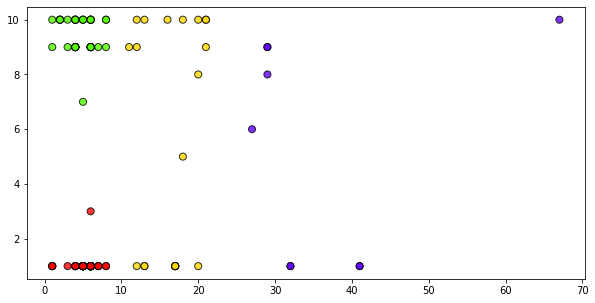

In [85]:
counter = 1
for k in set(groups.result()):
    print("Кластер №", counter, sep = '', end = '')
    print(':', *ans[k])
    counter += 1
labels = [0 for i in range (0, int(288724 / 2000) + 1)]
colors = dict()
for key in ans:
    colors[key] = randrange(200)
    for elem in ans[key]:
        labels[elem] = colors[key]
X = df.loc[0::2000].values
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1],  marker = 'o', s = 50, cmap='prism', c=labels, alpha=0.8, edgecolors='black')
plt.show()

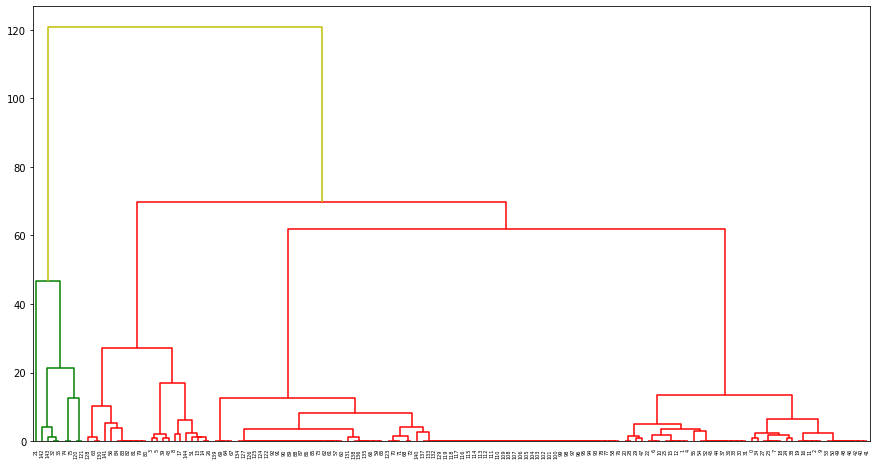

In [145]:
ytdist = df.loc[0::2000].values
Z = hierarchy.linkage(ytdist, 'ward')
plt.figure(figsize=(15,8))
dn = hierarchy.dendrogram(Z, above_threshold_color='y',orientation='top')
plt.show()


# ПОИСК АССОЦИАТИВНЫХ ПРАВИЛ

In [100]:
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
df = df.drop(
    ['Column1', 'author', 'date', 'id', 'reply', 'tutorlink'], axis=1)
df = df.dropna()

In [4]:
data = {}
trans = 0
ignore = ["в", "и", "а", "но", "я", "к", "в", "с", "\n", "", ",", "за",
          "на", "бы", " ", "мы", "что", "мне", "у", "ее", "на", "-", "очень",
          "до", "по", "нас", "она", "пор", "сих", "это", "как", "из", "не",
          "profi", "ru", "s", "p", "так", "нам", "своим", "во"]
cnt = 0
for index, row in df.iterrows():
    cnt += 1
    trans += 1
    for word in re.split('[ .,!?()]', row.text):
        item = word.strip(' .,!?()').lower()
        if item not in ignore:
            if item not in data:
                data[item] = set()
            data[item].add(trans)
    if cnt == 110000:
        break

In [6]:
dict_id = 0
minsup = 50
confidence = 70
np.random.seed(42)
FreqItems = dict()
Eclat.eclat([], sorted(data.items(), key=lambda item: len(item[1]), reverse=True), dict_id)
Rules = Eclat.rules(FreqItems, confidence)
for a, b, supp, conf, lift in sorted(Rules):
     print("{} ==> {} support: {} confidence: {} \n".format((a), (b), round(supp, 4), round(conf, 4), round(lift, 4)))

('"ваш',) ==> ('репетитор"',) support: 55 confidence: 88.7097 

('баумана',) ==> ('мгту',) support: 62 confidence: 86.1111 

('баумана', 'им') ==> ('мгту',) support: 50 confidence: 90.9091 

('бог',) ==> ('дай',) support: 58 confidence: 71.6049 

('богу',) ==> ('слава',) support: 56 confidence: 94.9153 

('дай',) ==> ('бог',) support: 58 confidence: 95.082 

('домашнему',) ==> ('заданию',) support: 55 confidence: 94.8276 

('заведение',) ==> ('учебное',) support: 53 confidence: 91.3793 

('запаса',) ==> ('словарного',) support: 83 confidence: 90.2174 

('им', 'баумана') ==> ('мгту',) support: 50 confidence: 90.9091 

('им', 'мгту') ==> ('баумана',) support: 50 confidence: 98.0392 

('мгту',) ==> ('баумана',) support: 62 confidence: 84.9315 

('мгту', 'им') ==> ('баумана',) support: 50 confidence: 98.0392 

('репетитор"',) ==> ('"ваш',) support: 55 confidence: 83.3333 

('слава',) ==> ('богу',) support: 56 confidence: 88.8889 

('словарного',) ==> ('запаса',) support: 83 confidence: 100